# Group Members:

*   Nicolás Vila Alarcón (240230)
*   David Pérez Carrasco (241375)
*   Guillem Escriba Molto (242123)

# Lab 2 Assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive"


/content/drive/MyDrive


# **Practical session 2: an image denoising energy**

## **1. Gradient descent**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

### **1. Complete the MatLab functions toy_fun and toy_gradient. These functions implement the function f and its gradient.**

**toy_fun**

\begin{equation}
f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)
\end{equation}

In [ ]:
def toy_fun(x: np.matrix):
    """
    Polynomial toy function - see the guide
    
    :param x: 2x1 vector 
    
    :return y: value of the function at point x
    """
    # TODO: Compute the function
    y = 1/1000*(pow(x[0],4)+pow(x[1],4)-80*pow(x[0],2)-60*pow(x[1],2)+100*x[0]+50*x[1]+1)
    return y

In [ ]:
x = np.matrix([[1],[2]])
y = toy_fun(x)
print(y)

[[-0.102]]


**toy_gradient**

We know that:

$$\nabla f(x_{1},x_{2}) =
\begin{bmatrix}
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{1}}\\
\\
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{2}}
\\
\end{bmatrix} =
\begin{bmatrix}
\frac1{1000}\left(4x_1^3 - 160 x_1 + 100\right)\\
\\
\frac1{1000}\left(4x_2^3 - 120 x_2 + 50\right)
\\
\end{bmatrix}$$

In [ ]:
def toy_gradient(x: np.matrix):
    """
    Gradient of toy_fun polynomial toy function 
    
    :param x: 2x1 matrix 
    :return grad: 2x1 matrix: gradient of the toy function at point x
    """
    # TODO: Compute the gradient of the toy function (must be calculated by hand)
    grad = np.matrix([[1/1000*(4*pow(x[0,0],3)-160*x[0,0]+100)],[1/1000*(4*pow(x[1,0],3)-120*x[1,0]+50)]])
    return grad

In [ ]:
#x = np.array([1,2])
x = np.matrix([1, 2])
grad = toy_gradient(x.T)
print(grad)

[[-0.056]
 [-0.158]]


### **2. Complete the MatLab function gradient_descent. This function implements a gradient descent algorithm. We are going to implement it in a way in which we can use the same gradient descent function for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.**

In [ ]:
def gradient_descent(callback,
                     callback_params: dict, 
                     initial_condition: np.matrix, 
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: gradient of function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and 
                            its gradient.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when 
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    

    # Main loop for Gradient Descent
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run the gradient descent
        gf = np.matrix([])
        gf = callback(current_value, **callback_params)
        
        # TODO: Update the current value and norm value
        current_value = np.matrix([])
        current_value = previous_value - step_size*gf

        current_norm_value = np.matrix([])
        current_norm_value = np.linalg.norm(gf)
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))
        
        # Plot current position! Just for visualization purposes 
        # if x is a 2x1 vector (visualization of toy example) 
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[1, 0], current_value[0, 0], marker = 'o', color = "k")
            ax.plot([previous_value[1, 0], current_value[1, 0]], 
                    [previous_value[0, 0], current_value[0, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)            

        # Update the iteration
        current_iteration += 1
        
    return current_value

### **3 Run the following block and answer the questions on the PDF**

In [ ]:
def toy_main():
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    #plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z, 
                    corner_mask = False, levels = 150, 
                    linewidths=(1,), cmap = cm.coolwarm)
    
    # Set initial condition --> TRY CHANGING IT
    x0 = np.matrix([[-2], [-8]])

    # Set gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    step_size= 1
    tolerance = 0.01
    max_iterations = 200

    # Call gradient descent minimization
    print("First gradient descent ...")
    xs_1 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)

    # Set gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    step_size= 5
    tolerance = 0.1
    max_iterations = 100

    # Call gradient descent minimization
    print("\nSecond gradient descent ...")
    xs_2 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)

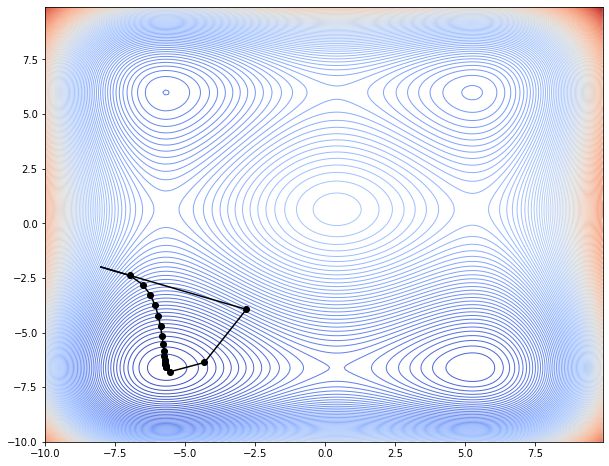

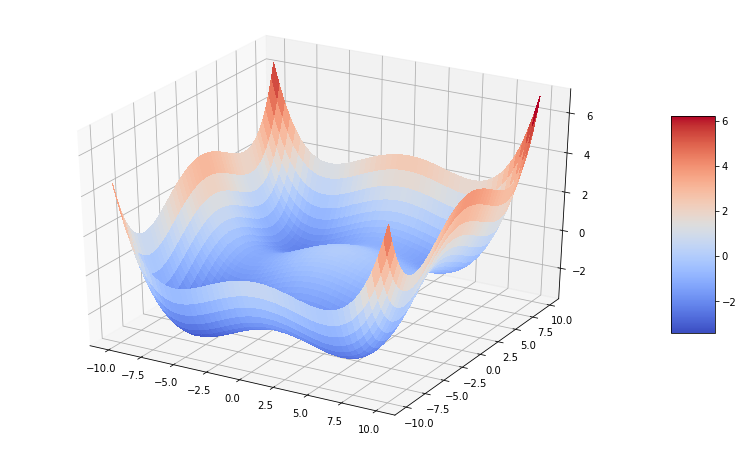

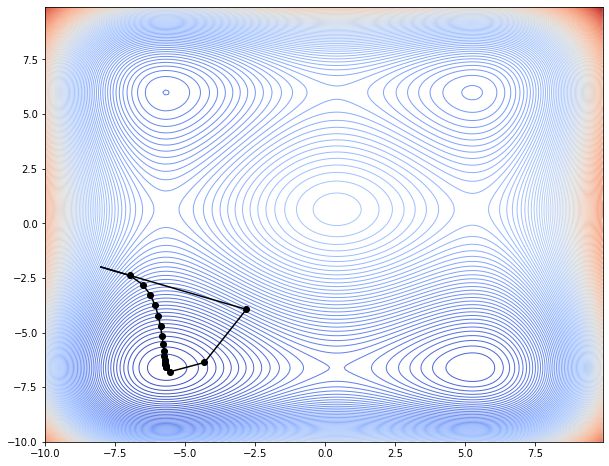

In [ ]:
toy_main()

1) In total, as we can see in the plot above, there are 4 local minima.
2) When we set an initial value x = (-2, -8) the algorithm also converges to a minimum but a different one than when we used x0 = (5, 1). 





## **2. Image denoising energy**

### **1. Complete the functions _im_fwd_gradient_ and _im_bwd_divergence_. These functions compute the forward gradient &nabla;<sup>+</sup> and the backwards divergence div<sup>-</sup>. Follow the comments provided in the code. Avoid building the matrices &nabla;<sup>+</sup> and div<sup>-</sup>**

#### **1.1 im_fwd_gradient**

For matrix $u$, $\nabla^{+}u_{i,j} = (\nabla^{+}_{i}u_{i,j},\nabla^{+}_{j}u_{i,j})$ where:

$$\nabla^{+}_{i}u_{i,j} = \begin{cases}
  u_{i+1,j} - u_{i,j} & \text{if }i<M\\ 
  0& \text{if }i=M
\end{cases}$$

$$\nabla^{+}_{j}u_{i,j} = \begin{cases}
  u_{i,j+1} - u_{i,j} & \text{if }j<N\\ 
  0& \text{if }j=N
\end{cases}
$$


In [ ]:
def im_fwd_gradient(image: np.matrix):
    """
    Discrete gradient of an image using forward differences, with homogeneous Neuman boundary conditions.

    :param u: image (MxN)
            
    :return gradu_j: partial derivative in the j (rows) direction (also x direction)
    :return gradu_i: partial derivative in the i (cols) direction (also y direction)
    """
    # TODO: Get the size of the image
    image_shape = image.shape
    M = image_shape[0]
    N = image_shape[1]
    
    gradu_i = np.zeros((M, N))
    gradu_j = np.zeros((M,N))

    for i in range(M):
      for j in range(N):
        if i ==M-1:
          gradu_i[i,j] = 0
        else:
          gradu_i[i,j] = image[i+1,j]-image[i,j]
          
    for i in range(M):
      for j in range(N):
            if j == N-1:
              gradu_j[i,j] = 0
            else:
              gradu_j[i,j] = image[i,j+1]-image[i,j]

    return gradu_i, gradu_j

#### **1.2 im_bwd_divergence**

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) = 
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\ 
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\ 
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [ ]:
def im_bwd_divergence(gradient_i: np.matrix,
                      gradient_j: np.matrix):
    """
    Discrete divergence of a vector field using backwards differences. 
    This is the negative transpose of the im_fwd_gradient
    
    :param gradient_i: component of g in the direction j (rows) (also x direction)
    :param gradient_j: component of g in the direction i (cols) (also y direction)
    
    :return divg: backwards divergence of g
    """
    M = gradient_i.shape[0]
    N = gradient_i.shape[1]
    divg = np.zeros((M,N))

    for i in range(M):
      for j in range(N):
        if i == 0:
          divg[i,j] += gradient_i[i,j]

        if j == 0:
          divg[i,j] += gradient_j[i,j]

        if i == M-1:
          divg -= gradient_i[i-1,j]

        if j == N-1:
          divg -= gradient_j[i,j-1]

        if i<M-1 and i>0:
          divg[i,j] += (gradient_i[i, j] - gradient_i[i-1, j])

        if j<N-1 and j>0:
          divg[i,j] += gradient_j[i, j] - gradient_j[i, j-1] 
    
    return divg

### **2. Complete the functions denoise_energy and denoise_energy_gradient following the comments provided in the code. Avoid building sparse huge matrices.**

Let:

+ $u \rightarrow$ Decision variable (final image)
+ $f \rightarrow$ Noisy Image

Then,

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

In [ ]:
def denoise_energy(image: np.matrix,
                   noise: np.matrix,
                   coefficients: np.matrix,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term 
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """
    energy = 0.0
    
    image_shape = image.shape
    M = image_shape[0]
    N = image_shape[1]
    

    # TODO: Calculate the regularization term
    reg = 0.0
    grad_i, grad_j = im_fwd_gradient(image)
    for i in range(M):
      for j in range(N):
        reg += coefficients[i,j]* (pow(grad_i[i,j],2)+pow(grad_j[i,j],2))
    
    # TODO: Calculate the data attachment term
    dat = 0.0
    for i in range(M):
      for j in range(N):
        dat += beta*pow(image[i,j]-noise[i,j], 2)


    energy = reg + dat

    return energy

Also,

\begin{equation}
	\nabla E(u) = -2div^{-}(C\nabla^+u_{ij}) + 2\beta(u - f)
\end{equation}

In [ ]:
def denoise_energy_gradient(image: np.matrix,
                            noise: np.matrix,
                            coefficients: np.matrix,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term 
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u
    """
    grade = 0.0
    # TODO: Calculate the gradient of regularization term
    gradient_i, gradient_j = im_fwd_gradient(image)
    gradient_row = np.multiply(coefficients, gradient_i)
    gradient_column = np.multiply(coefficients, gradient_j)

    divg = im_bwd_divergence(gradient_row, gradient_column)

    regularization = -2*(divg)

    # TODO: Calculate the gradient of data attachment term
    data_attachment = 2*beta*(image-noise)

    # TODO: Calculate the gradient
    grade = regularization+data_attachment
    

    return grade

### **3. Run the blocks with different denoising parameters (&beta; and c). In the report, show results with different values of &beta; and different images c (you can use the examples provided in the notebook). Describe the effect of these parameters in the result.**

**Load the image**

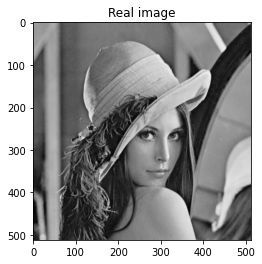

In [ ]:
images_dir = os.path.abspath("/content/drive/MyDrive/Lab2/images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

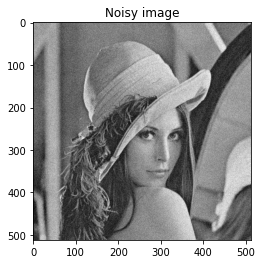

In [ ]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy image")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [ ]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),     # --> CHANGE THIS AND COMPARE
    "beta": 0.5                                      # --> CHANGE THIS AND COMPARE
}
step_size = 0.01                                    # --> CHANGE THIS AND COMPARE
max_iterations = 200                               # --> CHANGE THIS AND COMPARE
tolerance = .01                                    # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params, 
                            initial_condition = image_noisy, 
                            step_size = step_size, 
                            max_iterations = max_iterations,
                            tolerance = tolerance)

from sklearn.metrics import mean_squared_error

print("MSE: ", mean_squared_error(image_real, image_gd))

0 of 200 -> tolerance: 584454.8111035646
1 of 200 -> tolerance: 556992.9839775417
2 of 200 -> tolerance: 530916.250628821
3 of 200 -> tolerance: 506133.3908283448
4 of 200 -> tolerance: 482563.53072554927
5 of 200 -> tolerance: 460134.2412791371
6 of 200 -> tolerance: 438780.06406992127
7 of 200 -> tolerance: 418441.3628623776
8 of 200 -> tolerance: 399063.42368872004
9 of 200 -> tolerance: 380595.7448352943
10 of 200 -> tolerance: 362991.4722545837
11 of 200 -> tolerance: 346206.9466547954
12 of 200 -> tolerance: 330201.33664685686
13 of 200 -> tolerance: 314936.3384806325
14 of 200 -> tolerance: 300375.92755725206
15 of 200 -> tolerance: 286486.1504268382
16 of 200 -> tolerance: 273234.9486471164
17 of 200 -> tolerance: 260592.00789799826
18 of 200 -> tolerance: 248528.62727843283
19 of 200 -> tolerance: 237017.60487412632
20 of 200 -> tolerance: 226033.13656841745
21 of 200 -> tolerance: 215550.72574160626
22 of 200 -> tolerance: 205547.10201757294
23 of 200 -> tolerance: 196000.147

In [ ]:
print("MSE: ", mean_squared_error(image_real, image_noisy))

MSE:  832.5872677265218


**Show the results**

Text(0.5, 1.0, 'Gradient Descent image')

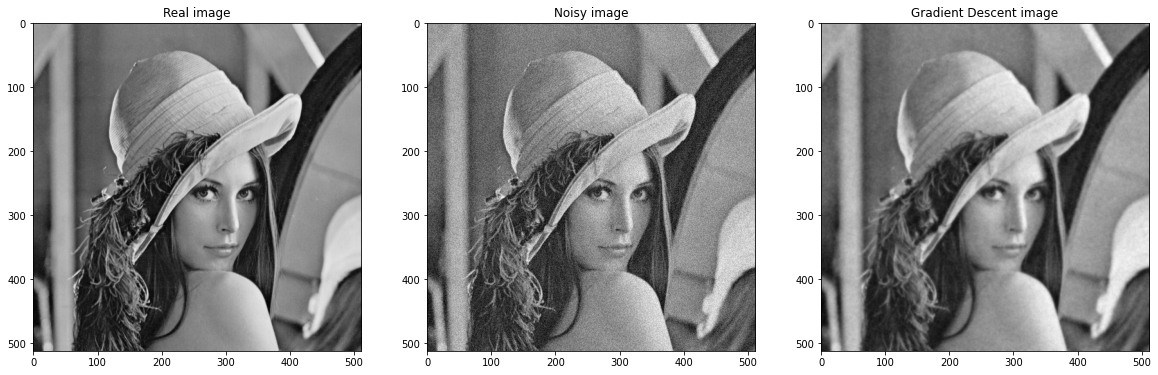

In [ ]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy image")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

Text(0.5, 1.0, 'Absolute error: real image vs denoised')

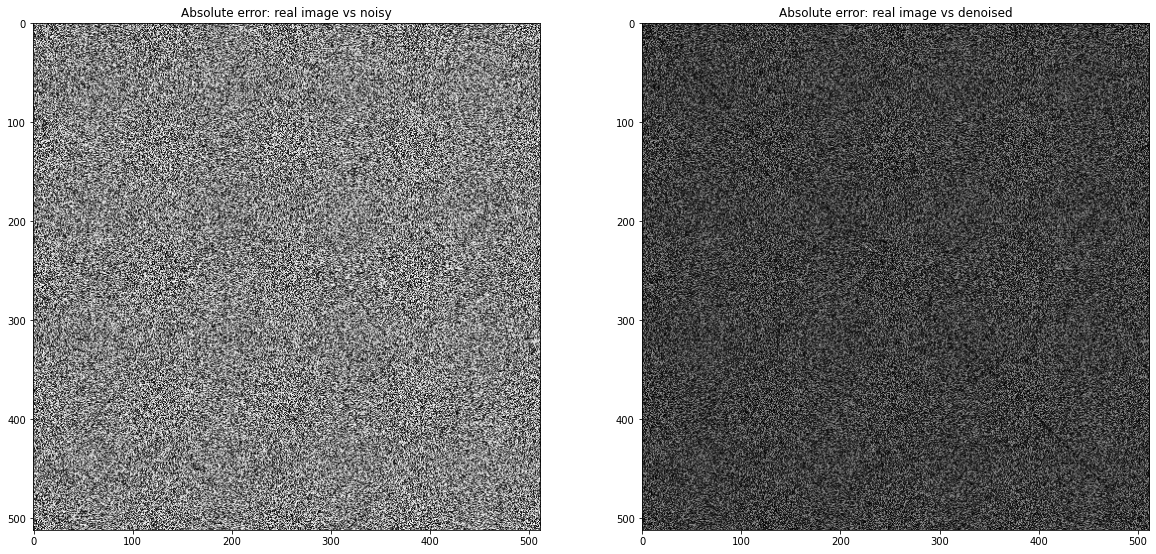

In [ ]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

Text(0.5, 1.0, 'method noise')

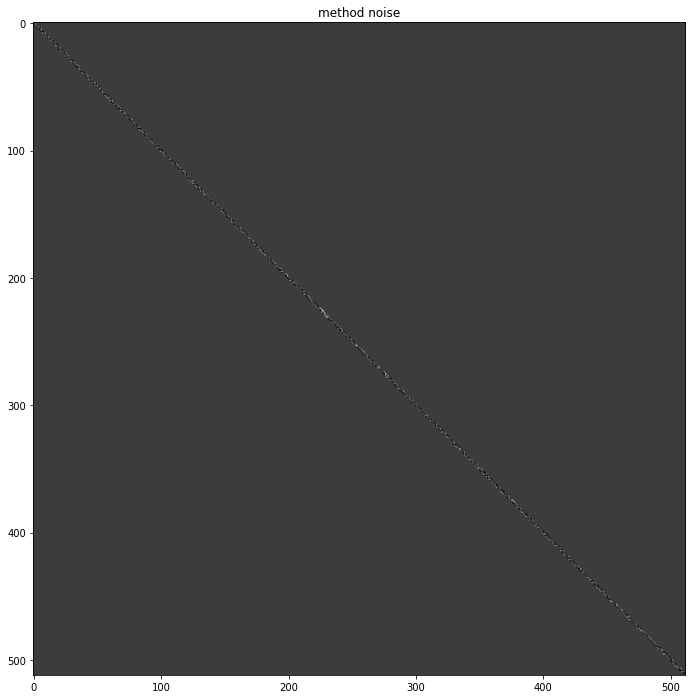

In [ ]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')

After trying different configurations for the parameters, we could see that when we achieved the smallest MSE,the output image had still noise and was similar to the noisy image. However, 
0,2-0,05
0,5-0,05